### EDA on the Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data, drop string values
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_df = pd.get_dummies(train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1))
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# train_df.isnull().sum()
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
5,6,0,3,NaN,0,0,8.4583,False,True,False,True,False
17,18,1,2,NaN,0,0,13.0000,False,True,False,False,True
19,20,1,3,NaN,0,0,7.2250,True,False,True,False,False
26,27,0,3,NaN,0,0,7.2250,False,True,True,False,False
28,29,1,3,NaN,0,0,7.8792,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,0,7.2292,False,True,True,False,False
863,864,0,3,NaN,8,2,69.5500,True,False,False,False,True
868,869,0,3,NaN,0,0,9.5000,False,True,False,False,True
878,879,0,3,NaN,0,0,7.8958,False,True,False,False,True


In [38]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
Sex_female       2
Sex_male         2
Embarked_C       2
Embarked_Q       2
Embarked_S       2
dtype: int64

In [39]:
train_df.sort_values(by=['Pclass'], ascending=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
445,446,1,1,4.0,0,2,81.8583,False,True,False,False,True
310,311,1,1,24.0,0,0,83.1583,True,False,True,False,False
309,310,1,1,30.0,0,0,56.9292,True,False,True,False,False
307,308,1,1,17.0,1,0,108.9000,True,False,True,False,False
306,307,1,1,NaN,0,0,110.8833,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,0,3,19.0,0,0,7.7750,False,True,False,False,True
381,382,1,3,1.0,0,2,15.7417,True,False,True,False,False
382,383,0,3,32.0,0,0,7.9250,False,True,False,False,True
371,372,0,3,18.0,1,0,6.4958,False,True,False,False,True


In [40]:
# basic stats on survivors
train_df[train_df['Survived']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [41]:
# basic stats on dyers
train_df[train_df['Survived']==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


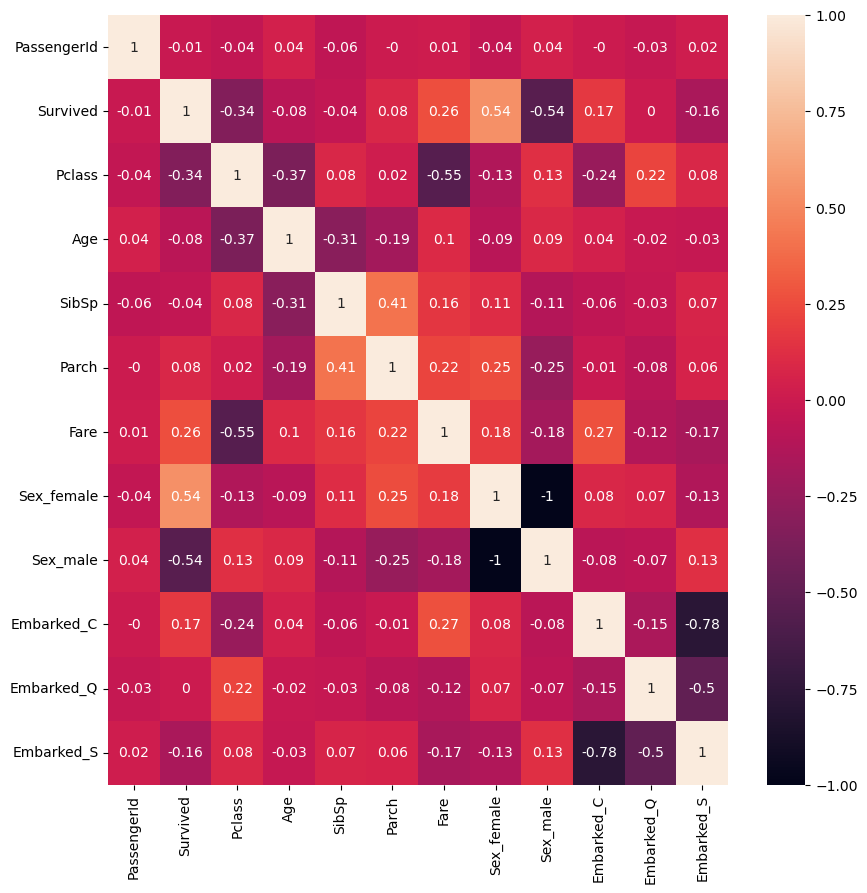

In [55]:
sns.heatmap(train_df.corr().round(2), annot=True)
plt.show()

In [13]:
test_df = pd.read_csv('test.csv')
test_df = pd.get_dummies(test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1))
test_df.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [14]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,True,False,True,False
1,893,3,47.0,1,0,7.0000,True,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,True,False,True,False
3,895,3,27.0,0,0,8.6625,False,True,False,False,True
4,896,3,22.0,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,False,True,False,False,True
414,1306,1,39.0,0,0,108.9000,True,False,True,False,False
415,1307,3,38.5,0,0,7.2500,False,True,False,False,True
416,1308,3,NaN,0,0,8.0500,False,True,False,False,True
